In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_colwidth = 500


/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
s3_prefix = 's3://olgabot-maca/facs/sourmash_search/'
txt = 'aws_s3_ls_sourmash_search.txt'


! aws s3 ls $s3_prefix > $txt
! cat $txt

2018-09-20 00:18:45    6316566 A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv
2018-09-21 18:55:39    6836382 A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=True.csv
2018-09-20 01:12:02    6773285 A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv
2018-09-21 19:58:25    6976407 A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=True.csv
2018-09-20 01:20:08    9280816 A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv
2018-09-21 19:13:18    9942896 A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=True.csv
2018-09-20 05:44:11   10099611 A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv
2018-09-21 20:23:28   10152045 A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=True.csv
2018-09-20 00:22:44    6525228 A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv
2018-09-21 18:42:00    6841295 A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignor

In [3]:
aws_s3_ls = pd.read_table(txt, delim_whitespace=True, names=['date', 'time', 'size', 'basename'])
aws_s3_ls

,date,time,size,basename
0,2018-09-20,00:18:45,6316566,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv
1,2018-09-21,18:55:39,6836382,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=True.csv
2,2018-09-20,01:12:02,6773285,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv
3,2018-09-21,19:58:25,6976407,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=True.csv
4,2018-09-20,01:20:08,9280816,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv
5,2018-09-21,19:13:18,9942896,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=True.csv
6,2018-09-20,05:44:11,10099611,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv
7,2018-09-21,20:23:28,10152045,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=True.csv
8,2018-09-20,00:22:44,6525228,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv
9,2018-09-21,18:42:00,6841295,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=True.csv


In [4]:
import re

In [5]:
s = 'A1-B000610-3_56_F-1-1_tabula-muris-k51-protein_ignore-abundance=False'
pattern = 'k(?P<ksize>\d+)-(?P<seq>\w+)_ignore-abundance=(?P<ignore_abundance>True|False)'
re.findall(pattern, s)

[('51', 'protein', 'False')]

In [6]:
parameters = aws_s3_ls.basename.str.extract(pattern, expand=True)
parameters['ksize'] = parameters['ksize'].astype(int)
parameters['ignore_abundance'] = parameters['ignore_abundance'] == "True"
parameters

,ksize,seq,ignore_abundance
0,21,dna,False
1,21,dna,True
2,21,protein,False
3,21,protein,True
4,27,dna,False
5,27,dna,True
6,27,protein,False
7,27,protein,True
8,33,dna,False
9,33,dna,True


In [7]:
aws_s3_ls_parameters = pd.concat([aws_s3_ls, parameters], axis=1)
aws_s3_ls_parameters

,date,time,size,basename,ksize,seq,ignore_abundance
0,2018-09-20,00:18:45,6316566,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv,21,dna,False
1,2018-09-21,18:55:39,6836382,A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=True.csv,21,dna,True
2,2018-09-20,01:12:02,6773285,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv,21,protein,False
3,2018-09-21,19:58:25,6976407,A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=True.csv,21,protein,True
4,2018-09-20,01:20:08,9280816,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv,27,dna,False
5,2018-09-21,19:13:18,9942896,A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=True.csv,27,dna,True
6,2018-09-20,05:44:11,10099611,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv,27,protein,False
7,2018-09-21,20:23:28,10152045,A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=True.csv,27,protein,True
8,2018-09-20,00:22:44,6525228,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv,33,dna,False
9,2018-09-21,18:42:00,6841295,A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=True.csv,33,dna,True


In [8]:
import glob
import os
import re

dfs = []



for i, row in aws_s3_ls_parameters.iterrows():
    filename = s3_prefix + row['basename']
    print(filename)
    try:
        df = pd.read_csv(filename)
    except pd.io.parsers.EmptyDataError:
        continue
        
    
    df['ksize'] = row['ksize']
    df['seq'] = row['seq']
    df['ignore_abundance'] = row['ignore_abundance']
    dfs.append(df)
    
search_results = pd.concat(dfs, ignore_index=True)
search_results.head()

s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=False.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k21-dna_ignore-abundance=True.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=False.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k21-protein_ignore-abundance=True.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=False.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k27-dna_ignore-abundance=True.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=False.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k27-protein_ignore-abundance=True.csv
s3://olgabot-maca/facs/sourmash_search/A1-B000610-3_56_F-1-1_tabula-muris-k33-dna_ignore-abundance=False.csv
s3://ol

,similarity,name,filename,md5,ksize,seq,ignore_abundance
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,False
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,False
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,False
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,False
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,False


In [9]:
def combine_cell_ontology_free_annotation(row):
    if pd.notnull(row['free_annotation']):
        return '{cell_ontology_class} ({free_annotation})'.format(**row)
    else:
        return row['cell_ontology_class']


def extract_cell_annotations(name_column):
    pattern = '(\w+):([\w\d\-_]+)'
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns=0, values=1, index='level_0')
    annotations['cell_ontology_free_annotation'] = annotations.apply(combine_cell_ontology_free_annotation, axis=1)
    return annotations 

In [10]:
cell_annotation_pattern = '(\w+):([\w\d\-_]+)'

annotations = extract_cell_annotations(search_results.name)
annotations.head()

,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
level_0,,,,,,
0,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [11]:
search_results_annotated = search_results.join(annotations)
print(search_results_annotated.shape)
search_results_annotated.head()

(632205, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,False,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,False,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,False,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,False,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,False,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [12]:
search_results_annotated.groupby(['filename', 'ignore_abundance']).apply(lambda x: x.nlargest(5, 'similarity'))

similarity  \
filename                 ignore_abundance                      
tabula-muris-k21-dna     False            0         1.000000   
                                          1         0.893563   
                                          2         0.879294   
                                          3         0.876851   
                                          4         0.872425   
                         True             32221     1.000000   
                                          32222     0.124448   
                                          32223     0.122405   
                                          32224     0.122006   
                                          32225     0.120988   
tabula-muris-k21-protein False            68837     1.000000   
                                          68838     0.856142   
                                          68839     0.851372   
                                          68840     0.845885   
                                          68841     0.842568   
                         True             103854    1.000000   
                                          103855    0.149921   
                                          103856    0.149507   
                                          103857    0.148724   
                                          103858    0.148414   
tabula-muris-k27-dna     False            140470    1.000000   
                                          140471    0.684804   
                                          140472    0.669025   
                                          140473    0.667703   
                                          140474    0.643019   
                         True             189276    1.000000   
                                          189277    0.115009   
                                          189278    0.114337   
                                          189279    0.113759   
                                          189280    0.112706   
...                                                      ...   
tabula-muris-k33-protein False            418926    1.000000   
                                          418927    0.812099   
                                          418928    0.793054   
                                          418929    0.787860   
                                          418930    0.786394   
                         True             455541    1.000000   
                                          455542    0.116353   
                                          455543    0.114813   
                                          455544    0.113768   
                                          455545    0.112678   
tabula-muris-k51-dna     False            492157    1.000000   
                                          492158    0.888683   
                                          492159    0.874071   
                                          492160    0.869270   
                                          492161    0.866028   
                         True             524958    1.000000   
                                          524959    0.092182   
                                          524960    0.091536   
                                          524961    0.091147   
                                          524962    0.090831   
tabula-muris-k51-protein False            561574    1.000000   
                                          561575    0.765420   
                                          561576    0.740711   
                                          561577    0.738476   
                                          561578    0.737397   
                         True             595589    1.000000   
                                          595590    0.104871   
                                          595591    0.101365   
                                          595592    0.100462   
                                          595593    0.098722   

                 

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


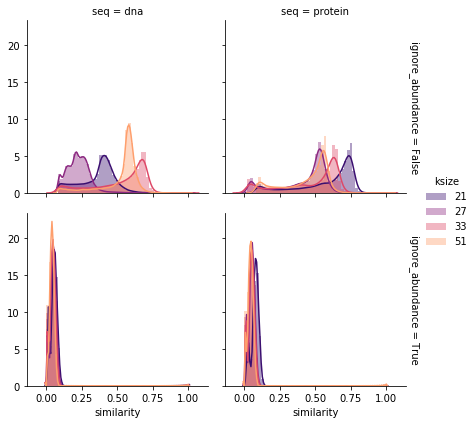

In [39]:
g = sns.FacetGrid(search_results_annotated, hue='ksize', palette='magma', 
                  col='seq', row='ignore_abundance', margin_titles=True)
g.map(sns.distplot, 'similarity')
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


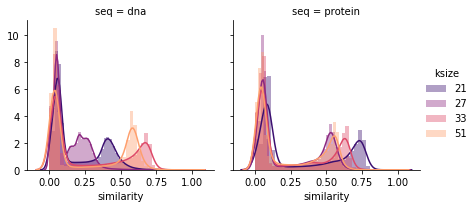

In [14]:
g = sns.FacetGrid(search_results_annotated, hue='ksize', palette='magma', 
                  col='seq')
g.map(sns.distplot, 'similarity')
g.add_legend()

In [15]:
tissue_colors = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/15_color_palette/tissue_colors.csv', 
                            squeeze=True, index_col=0)
tissue_colors.head()

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Name: color, dtype: object

## Look at `ignore_abundance=True` and `ignore_abundance=False` separately

In [16]:
ignore_abundance_true = search_results_annotated.query('ignore_abundance == True')
print(ignore_abundance_true.shape)
ignore_abundance_true.head()

(325508, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
32221,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,True,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32222,0.124448,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:B3-B000610-3_56_F-1-1,tabula-muris-k21-dna,541dda9d6808dc1eab01e9cacc96b38a,21,dna,True,B3-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32223,0.122405,cell_ontology_class:mesenchymal_stem_cell_of_adipose|tissue:Fat|subtissue:SCAT|free_annotation:mesenchymal_progenitor|cell_id:P22-D043526-3_39_F-1-1,tabula-muris-k21-dna,6ab5687d4fc4d8e9023a0eaa402d94d8,21,dna,True,P22-D043526-3_39_F-1-1,mesenchymal_stem_cell_of_adipose,mesenchymal_progenitor,SCAT,Fat,mesenchymal_stem_cell_of_adipose (mesenchymal_progenitor)
32224,0.122006,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O1-D041914-3_8_M-1-1,tabula-muris-k21-dna,9399f462ae69da91b1e7af88454718bc,21,dna,True,O1-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32225,0.120988,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N1-D041914-3_8_M-1-1,tabula-muris-k21-dna,e98eae8888ad3fbe82dae57d7a09f4f8,21,dna,True,N1-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [17]:
ignore_abundance_false = search_results_annotated.query('ignore_abundance == False')
print(ignore_abundance_false.shape)
ignore_abundance_false.head()

(306697, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,False,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,False,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,False,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,False,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,False,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


### `Ignore_abundance=True`

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


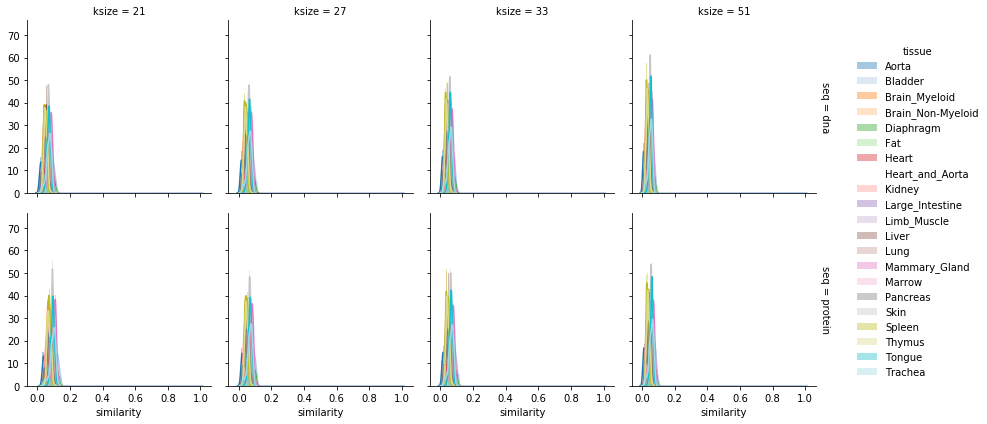

In [21]:
g = sns.FacetGrid(ignore_abundance_true, col='ksize', hue='tissue', row='seq',
                  palette=tissue_colors, margin_titles=True, hue_order=tissue_colors.index)
g.map(sns.distplot, 'similarity')
g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


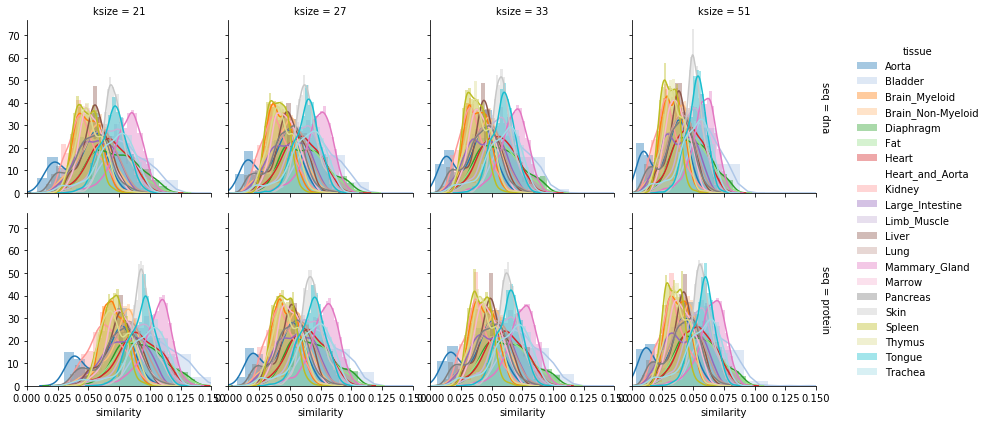

In [26]:
g = sns.FacetGrid(ignore_abundance_true, col='ksize', hue='tissue', row='seq',
                  palette=tissue_colors, margin_titles=True, hue_order=tissue_colors.index)
g.map(sns.distplot, 'similarity')
g.set(xlim=(0, 0.15))
g.add_legend()

### Ignore abundance False

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


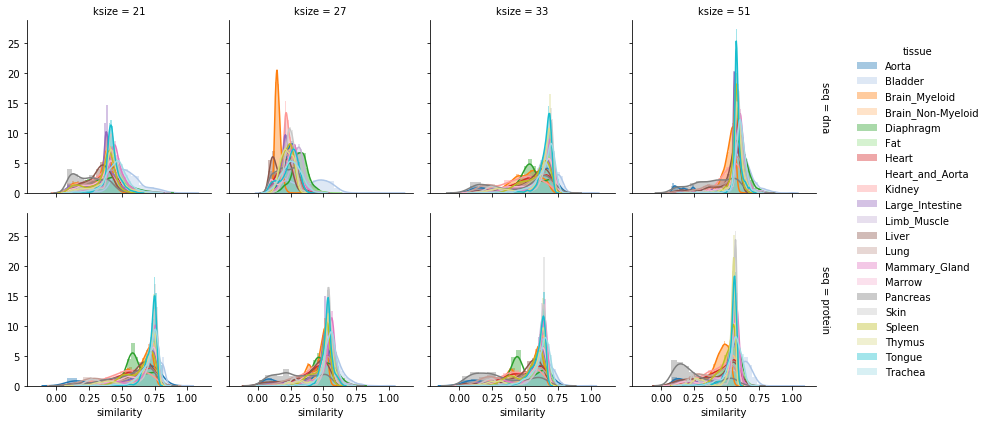

In [40]:
g = sns.FacetGrid(ignore_abundance_false, col='ksize', hue='tissue', row='seq',
                  palette=tissue_colors, margin_titles=True, hue_order=tissue_colors.index)
g.map(sns.distplot, 'similarity')
g.add_legend()
g.savefig('../figures/bladder_within_tabula_muris_ignore_abundance_false_similarity_per_tissue.pdf')

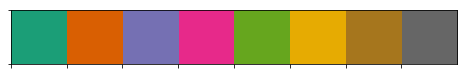

In [24]:
import matplotlib as mpl

dark2 = sns.color_palette('Dark2')
dark2 = [mpl.colors.rgb2hex(x) for x in dark2]
sns.palplot(dark2)

bladder = 'Bladder'


highlight_bladder_colors = tissue_colors.copy()
highlight_bladder_colors[highlight_bladder_colors.index != bladder] = 'lightgrey'
highlight_bladder_colors[bladder] = dark2[3]

hue_order = highlight_bladder_colors.index.difference([bladder]).tolist()
hue_order.append(bladder)
hue_order

palette = highlight_bladder_colors[hue_order]
palette

tissue_kws = dict(hue='tissue', palette=palette, 
                  hue_order=hue_order)

### Ignore abundance True

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


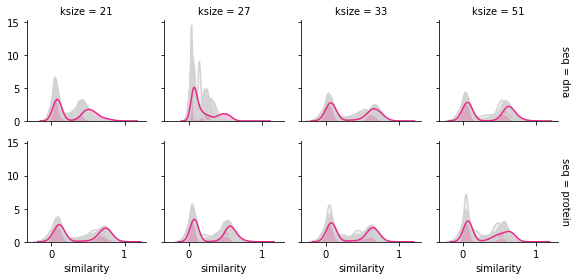

In [25]:
g = sns.FacetGrid(ignore_abundance_true, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **tissue_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
# g.set(xlim=(0, 0.2), ylim=(0, 100))
# g.add_legend()

### Ignore abundance False

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


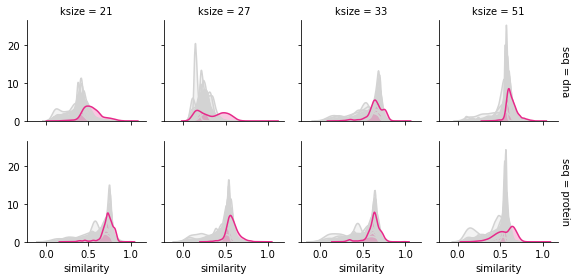

In [41]:
g = sns.FacetGrid(ignore_abundance_false, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **tissue_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
# g.set(xlim=(0, 0.15))
# g.set(xlim=(0, 0.2), ylim=(0, 100))
# g.add_legend()
g.savefig('../figures/bladder_within_tabula_muris_ignore_abundance_false_similarity_per_tissue_highlight_bladder.pdf')

## do same for cell ontology class, only highlighting "bladder cell"

In [30]:
bladder_cell = 'bladder_cell'

cell_ontology_hue_order = set(search_results_annotated.cell_ontology_class.unique()).difference([bladder])
cell_ontology_hue_order = list(cell_ontology_hue_order)
cell_ontology_hue_order.append(bladder_cell)
cell_ontology_hue_order

cell_ontology_palette = pd.Series('lightgrey', index=cell_ontology_hue_order)
cell_ontology_palette[bladder_cell] = dark2[0]
cell_ontology_palette

cell_ontology_kws = dict(hue='cell_ontology_class', palette=cell_ontology_palette, 
                  hue_order=cell_ontology_hue_order)

### ignore abundance true

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


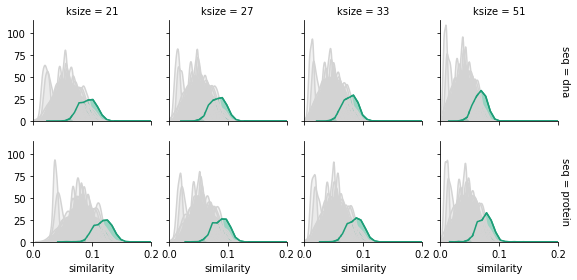

In [38]:
g = sns.FacetGrid(ignore_abundance_true, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **cell_ontology_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
g.set(xlim=(0, 0.2))
# g.add_legend()

### Ignore abundance false

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


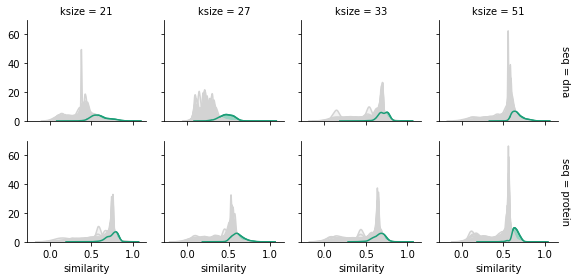

In [42]:
g = sns.FacetGrid(ignore_abundance_false, col='ksize', row='seq', 
                  margin_titles=True, size=2,
                  **cell_ontology_kws)
g.map(sns.kdeplot, 'similarity', shade=True)
# g.set(xlim=(0, 0.2), ylim=(0, 100))
# g.add_legend()
g.savefig('../figures/bladder_within_tabula_muris_ignore_abundance_false_similarity_per_tissue_highlight_bladder_cell.pdf')

## Look only within bladder

In [33]:
ignore_abundance_false_bladder = ignore_abundance_false.query('tissue == "Bladder"')
print(ignore_abundance_false_bladder.shape)
ignore_abundance_false_bladder.head()

(7849, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
0,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,False,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
1,0.893563,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A13-B000610-3_56_F-1-1,tabula-muris-k21-dna,15ca87e27d546f9b7972ff150a41480f,21,dna,False,A13-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
2,0.879294,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:E2-B000610-3_56_F-1-1,tabula-muris-k21-dna,edacf015289b20877385cd68188bd7bd,21,dna,False,E2-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
3,0.876851,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:K14-B000610-3_56_F-1-1,tabula-muris-k21-dna,772e252a524576ca4687ac7d6d4cd93c,21,dna,False,K14-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
4,0.872425,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:C15-B000610-3_56_F-1-1,tabula-muris-k21-dna,ceb6145f9e786c0ebce8a4b44b767d27,21,dna,False,C15-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


In [35]:
ignore_abundance_true_bladder = ignore_abundance_true.query('tissue == "Bladder"')
print(ignore_abundance_true_bladder.shape)
ignore_abundance_true_bladder.head()

(7862, 13)


,similarity,name,filename,md5,ksize,seq,ignore_abundance,cell_id,cell_ontology_class,free_annotation,subtissue,tissue,cell_ontology_free_annotation
32221,1.000000,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:A1-B000610-3_56_F-1-1,tabula-muris-k21-dna,3413cb3e2d21ab83572f49de51dac2e6,21,dna,True,A1-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32222,0.124448,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:B3-B000610-3_56_F-1-1,tabula-muris-k21-dna,541dda9d6808dc1eab01e9cacc96b38a,21,dna,True,B3-B000610-3_56_F-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32224,0.122006,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:O1-D041914-3_8_M-1-1,tabula-muris-k21-dna,9399f462ae69da91b1e7af88454718bc,21,dna,True,O1-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32225,0.120988,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:N1-D041914-3_8_M-1-1,tabula-muris-k21-dna,e98eae8888ad3fbe82dae57d7a09f4f8,21,dna,True,N1-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)
32226,0.120545,cell_ontology_class:bladder_cell|tissue:Bladder|subtissue:nan|free_annotation:Bladder_mesenchymal_cell|cell_id:F14-D041914-3_8_M-1-1,tabula-muris-k21-dna,8c2e9b2a7234f871b511ad94b55df6ee,21,dna,True,F14-D041914-3_8_M-1-1,bladder_cell,Bladder_mesenchymal_cell,nan,Bladder,bladder_cell (Bladder_mesenchymal_cell)


### Cell ontology

### Ignore abundance false

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


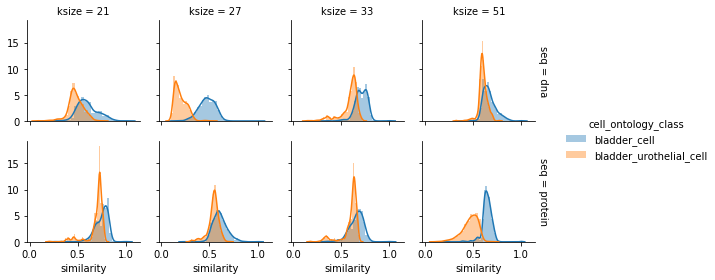

In [36]:
g = sns.FacetGrid(ignore_abundance_false_bladder, col='ksize', hue='cell_ontology_class',
                 row='seq', margin_titles=True, size=2)
g.map(sns.distplot, 'similarity')
g.add_legend()

### Ignore abundance true

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


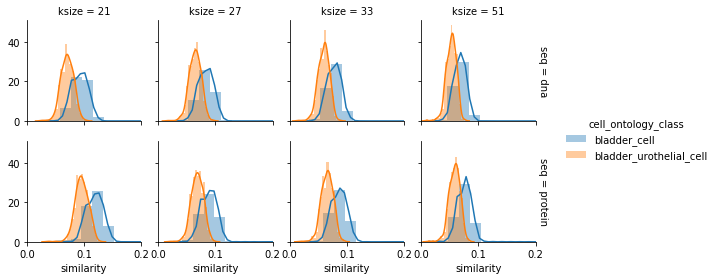

In [43]:
g = sns.FacetGrid(ignore_abundance_true_bladder, col='ksize', hue='cell_ontology_class',
                 row='seq', margin_titles=True, size=2)
g.map(sns.distplot, 'similarity')
g.set(xlim=(0, 0.2))
g.add_legend()

### Cell ontology + free annotation

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


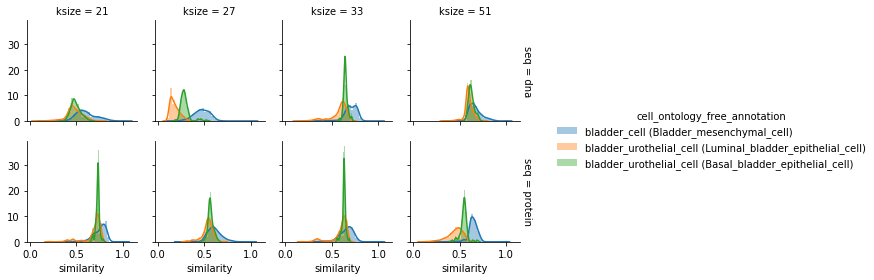

In [44]:
g = sns.FacetGrid(ignore_abundance_false_bladder, col='ksize', hue='cell_ontology_free_annotation',
                 row='seq', margin_titles=True, size=2)
g.map(sns.distplot, 'similarity')
g.add_legend()
g.savefig('../figures/bladder_within_tabula_muris_ignore_abundance_false_similarity_per_cell_ontology_highlight_bladder_cell.pdf')

In [103]:
# g = sns.FacetGrid(search_results_annotated_bladder,  hue='name')
# g.map(plt.plot, 'ksize', 'similarity')
# # g.add_legend()

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


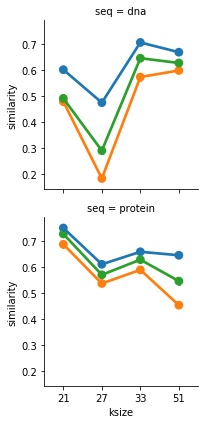

In [104]:
g = sns.FacetGrid(search_results_annotated_bladder,  hue='cell_ontology_free_annotation',
                 row='seq',)
g.map(sns.pointplot, 'ksize', 'similarity')
# g.add_legend()